In [31]:
import matplotlib.pyplot as plt
import math
import numpy as np

sigLevels = np.array([0.92, 0.943, 0.97, 0.985, 0.992, 0.998, 0.999])
ns = np.array([100, 200, 400, 800, 1600, 3200, 6400])


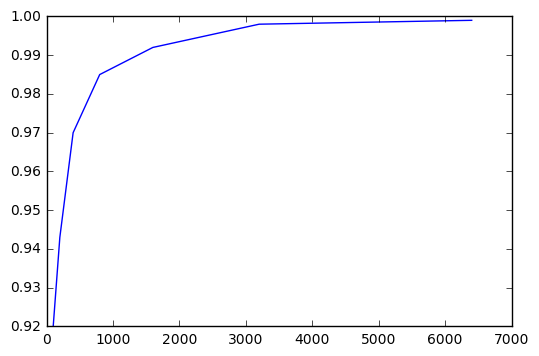

In [32]:
plt.plot(ns, sigLevels)
plt.show()

In [39]:
#This plot looks something like -1/n. Let's try a power model with x and 1-y

log_sigLevels = np.zeros((7,))
log_ns = np.zeros((7,))
for i in range(7):
    log_sigLevels[i] = math.log(1-sigLevels[i])
    log_ns[i] = math.log(ns[i])

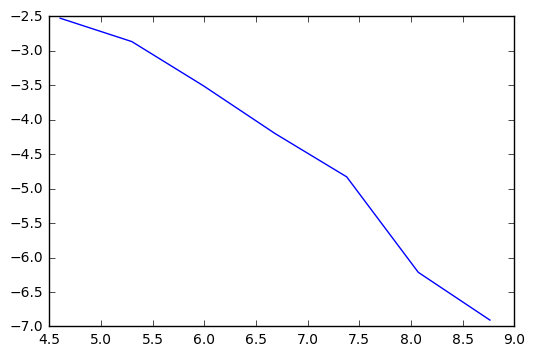

In [40]:
plt.plot(log_ns, log_sigLevels)
plt.show()

In [41]:
#That looks pretty linear which is really good for what we want.

from sklearn import linear_model

In [42]:
regModel = linear_model.LinearRegression()

In [43]:
regModel.fit(log_ns.reshape(-1, 1), log_sigLevels.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
regModel.coef_, regModel.intercept_

(array([[-1.0906591]]), array([ 2.85529367]))

From this, we can tell that there's quite a strong linear association between log of n (the number of objects) and log of the value of significanceLevel. As such, we can see that 1-significanceLevel tends to vary with $\frac{1}{x^{1.09}}$


There is a need to take precaution, however, as this was only tested on a single dataset. The same general shape and function will hold for other datasets, but the actual values will change depending on the number of dimensions as well as the data itself. Still, this is a good starting point for determining the values of the coefficients, especially as you can compute the function by computing the value of significanceLevel for small numbers of objects (as the function will run much faster for those cases), and then use that to estimate the value of significanceLevel for the number of objects desired. This way, you can get the accuracy of having many objects while having the speed of few objects when doing test runs to compute significanceLevel.